Number of points along x: 10
Number of points along y: 17


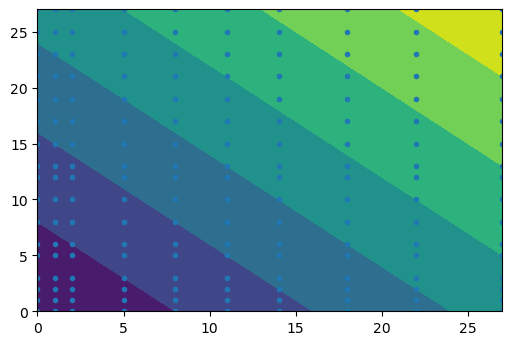

In [77]:
import torch
import torch.nn.functional as Fun
import matplotlib.pyplot as plt

# 64 points across, so working with two 32 point regions both above and below center
growth_x = 1.5
growth_y = 1.2

# num_samples = int(x_train.shape[0])
ar_len = 32

# the new nonuniform length
nu_len_x = int(ar_len**(1/growth_x))
print(f'Number of points along x: {nu_len_x}')
nu_len_y = int(ar_len**(1/growth_y))
print(f'Number of points along y: {nu_len_y}')

# generate positions for expanding and contracting section
exp_x = torch.zeros(nu_len_x)
exp_y = torch.zeros(nu_len_y)
for index in range(nu_len_x):
    exp_x[index] = index ** growth_x
exp_x = exp_x.int()
for index in range(nu_len_y):
    exp_y[index] = index ** growth_y
exp_y = exp_y.int()


# construct data
data = torch.zeros((nu_len_x, nu_len_y))
for row in range(nu_len_x):
    for col in range(nu_len_y):
        data[row, col] = exp_x[row] + exp_y[col]

x, y = torch.meshgrid(exp_x, exp_y)
plt.figure(dpi=100)
plt.contourf(x, y, data)
plt.scatter(x, y, marker='.')

torch.functional.grid_sample doesn't seem to have the capabilities we need

torch.Size([1, 1, 10, 17])
torch.Size([1, 27, 27, 2])


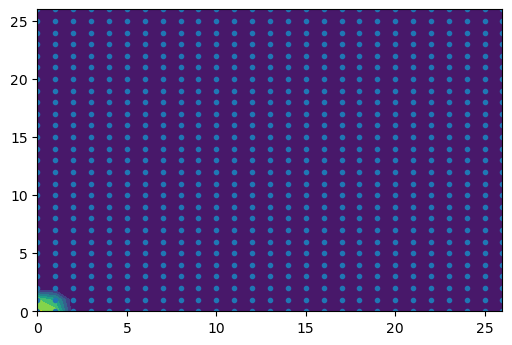

In [55]:
data1 = data.unsqueeze(0)
data2 = data1.unsqueeze(0).float()
print(data2.shape)

d = torch.linspace(0, 26, 27)
meshx, meshy = torch.meshgrid((d, d))
grid = torch.stack((meshy, meshx), 2)
grid = grid.unsqueeze(0) # add batch dim
print(grid.shape)

new_grid = Fun.grid_sample(data2, grid)

plt.figure(dpi=100)
plt.contourf(meshx, meshy, new_grid[0,0,:,:])
plt.scatter(meshx, meshy, marker='.')

and unfortunately neither does torch.functional.interpolate.

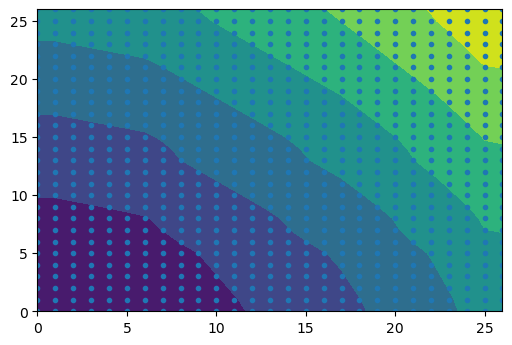

In [67]:
new_grid = Fun.interpolate(data2, [27,27], mode='bilinear')
plt.figure(dpi=100)
plt.contourf(meshx, meshy, new_grid[0,0,:,:])
plt.scatter(meshx, meshy, marker='.')

But scipy.interpolate.griddata does!

Number of points along x: 10
Number of points along y: 17


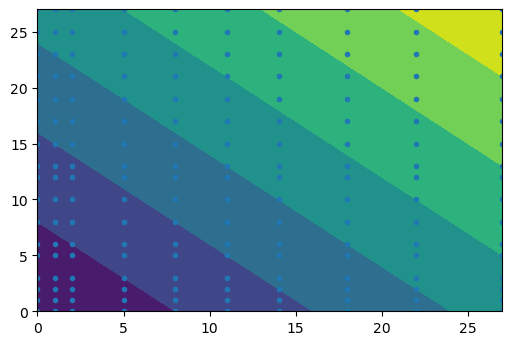

In [78]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# 64 points across, so working with two 32 point regions both above and below center
growth_x = 1.5
growth_y = 1.2

# num_samples = int(x_train.shape[0])
ar_len = 32

# the new nonuniform length
nu_len_x = int(ar_len**(1/growth_x))
print(f'Number of points along x: {nu_len_x}')
nu_len_y = int(ar_len**(1/growth_y))
print(f'Number of points along y: {nu_len_y}')

# generate positions for expanding and contracting section
exp_x = exp_x.numpy()
exp_y = exp_y.numpy()

x = x.numpy()
y = y.numpy()

# construct data
data = np.zeros((nu_len_x, nu_len_y))
for row in range(nu_len_x):
    for col in range(nu_len_y):
        data[row, col] = exp_x[row] + exp_y[col]

plt.figure(dpi=100)
plt.contourf(x, y, data)
plt.scatter(x, y, marker='.')

In [103]:
coordinates = np.stack((x.flatten(), y.flatten()), axis=1)
values = data.flatten()

d = np.arange(28)
dx, dy = np.meshgrid(d, d)
xi = np.stack((dx.flatten(), dy.flatten()), axis=1)

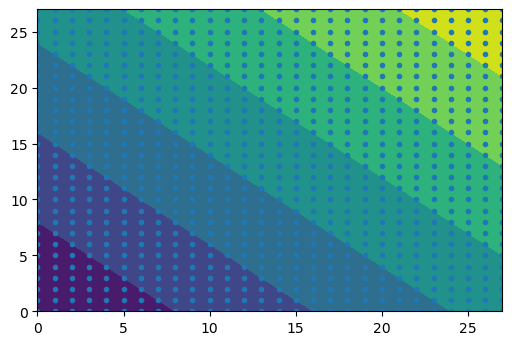

In [117]:
import scipy.interpolate
new_data = scipy.interpolate.griddata(coordinates, values, xi)

plt.figure(dpi=100)
plt.contourf(dx, dy, new_data.reshape((28,28)))
plt.scatter(dx, dy, marker='.')

Let's read in the file to make sure everything looks as it should.

Loading data.


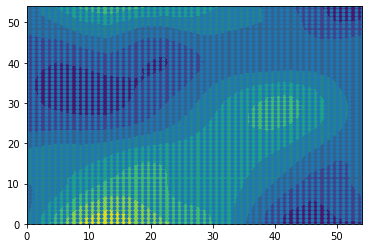

In [2]:
import sys
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.interpolate
import torch
import pdb

sys.path.append('../../')

from utilities3 import *

# import the training data
print(f'Loading data.')
train_dataloader = MatReader('../../../VNO_data/full_from_conexp_ns_V1e-3_N1100_T50.mat')
x_train = train_dataloader.read_field('u')[:,:,:,:]

size = 55
d = np.arange(size)
dx, dy = np.meshgrid(d, d)

plt.contourf(dx, dy, x_train[0,:,:,0])
plt.scatter(dx, dy, marker='.')

In [4]:
import numpy as np

np.arange(1,5)

array([1, 2, 3, 4])